<h2>Introduction</h2>
- Machine learning with iris dataset


- PROBLEM STATEMENT

<p>This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this data we will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features. We will be training the model based on these features.</p>

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white")

In [2]:
# files are available in archive sub-directory
import os
print(os.listdir("archive"))

['Iris.csv', 'database.sqlite']


<h3>Understanding the data</h3>

In [3]:
#import data
iris = pd.read_csv("archive/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# show columns
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# show datatypes
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# summary statistics
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<h3>Analysing the data visually</h3>

- At the outset , let us look at a simple scatter plot , to get a visual feel of the data. (We are going to view a host of them)

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

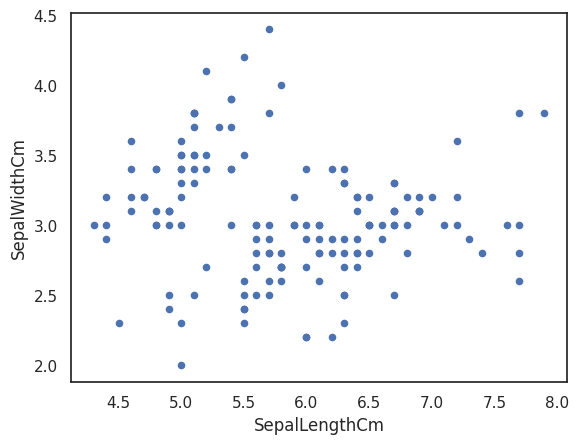

In [7]:
iris.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter")

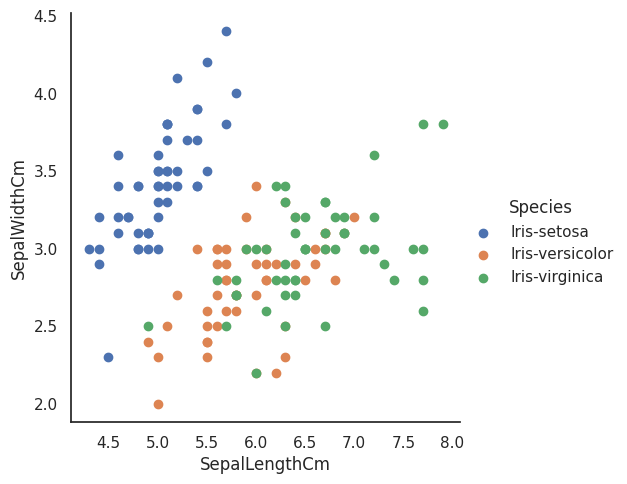

In [8]:
#  Use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", height = 5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

- use boxplot to view the distribution of data based on percentiles.Also show outliers

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

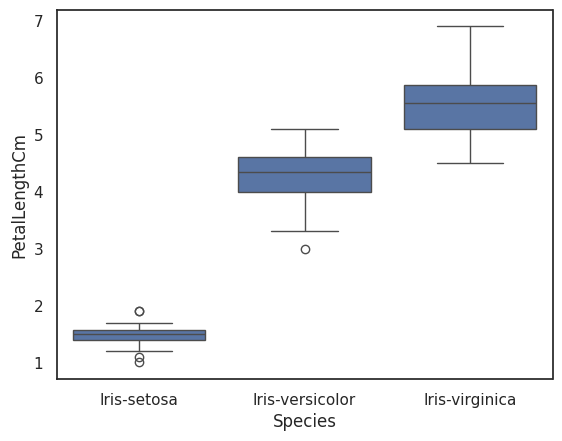

In [9]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

/tmp/ipykernel_32643/3784926840.py:9: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")


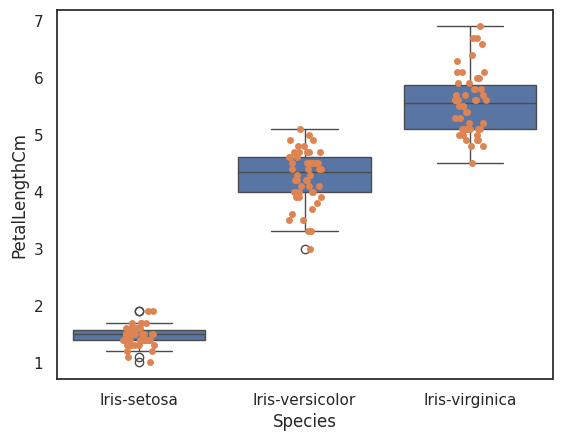

In [10]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot

# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

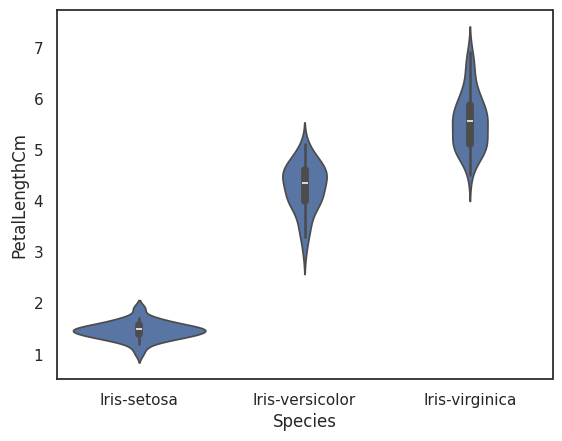

In [11]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=iris)

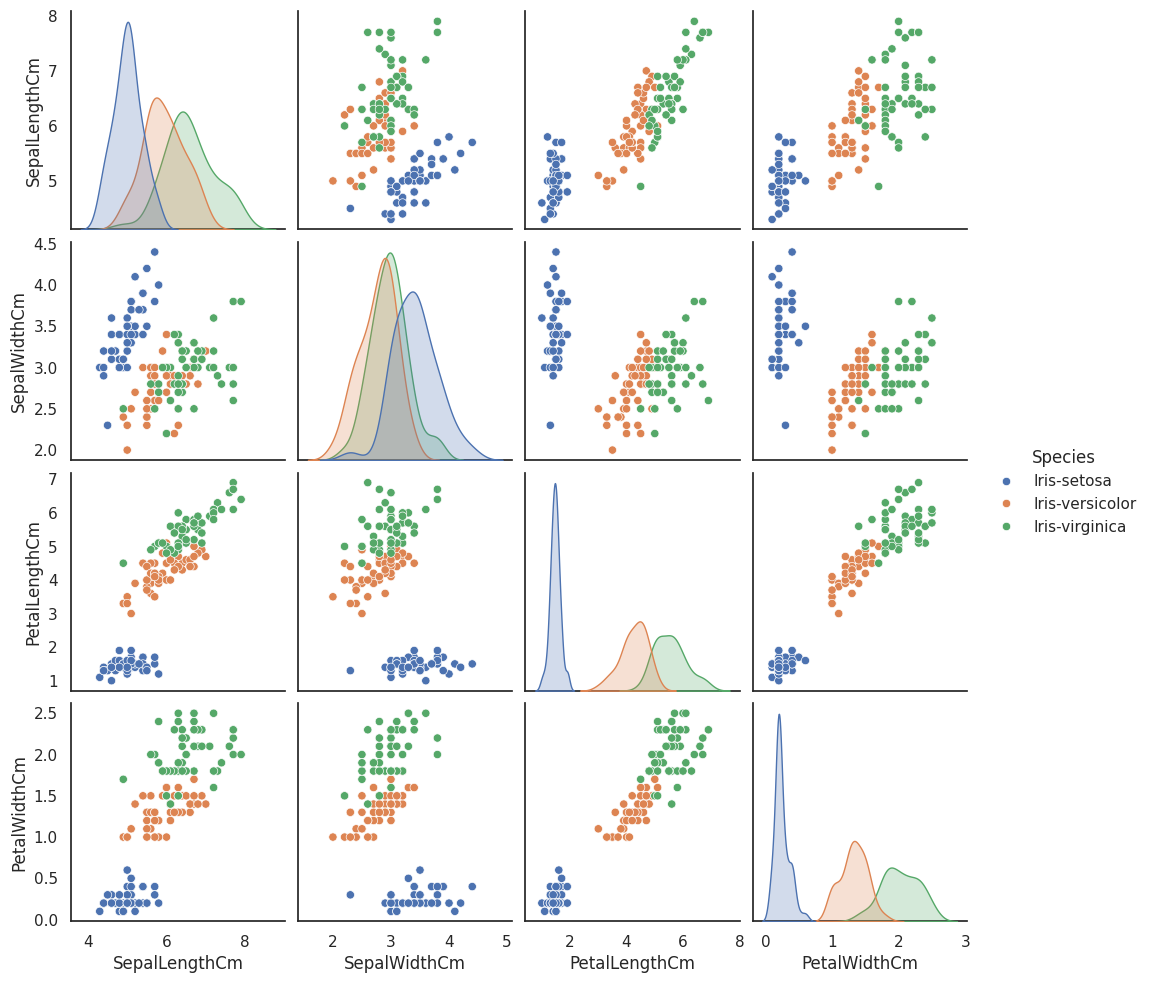

In [12]:
# pairplot to visualize bivariate relationships between each pair of features
sns.pairplot(iris.drop("Id", axis=1), hue="Species")


<Axes: >

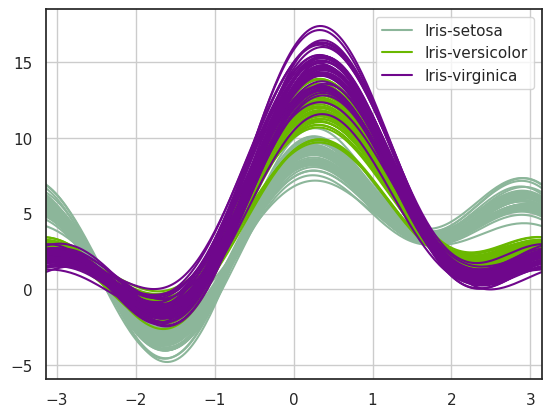

In [13]:
# plotting Andrew curves
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

<h3>Machine Learning</h3>
<h5>Dividing the data for training & testing</h5>

Once we have understood what the dataset is about, we can start training a model based on the algorithms. Here, we will be implementing some of the commonly used algorithms in machine learning. Let us start by training our model with some of the samples. We will be using an inbuilt library called ‘train_test_split’ which divides our data set into a ratio of 80:20.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [15]:
# separating the data into target & features
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
# Splitting the dataset into test & training features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state = 0
)

<h3>Training the model</h3>

Using some of the commonly used algorithms, we will be training our model to check how accurate every algorithm is. We will be implementing these algorithms to compare:
<ol>
<li>Logistic Regression</li> 
<li>K – Nearest Neighbour (KNN)</li>

<li>Support Vector Machine (SVM)</li>

<li> Decision Trees</li>
<li> Naive Bayes classifier</li>

</ol>
We can start with the first algorithm Logistic Regression. We can build our model like below:

In [20]:
# logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


/home/patrick/Documents/datascience/projects/iris/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
